In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import ttest_ind
data = pd.read_csv('D:\Education\somascan_171_vs_1305.tsv', sep='\t', decimal=",")
data.head()

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
0,11010,107,Female,PRIN09,4.056,2.198,2.955,2.790,2.475,3.628,...,4.157,2.465,2.835,4.280,3.448,3.171,2.959,5.095,3.688,2.520
1,11030,105,Male,PRIN09,3.957,2.250,3.036,2.708,2.469,3.697,...,4.086,2.344,2.924,4.416,3.636,3.146,3.023,5.150,3.680,2.485
2,11130,106,Female,PRIN09,4.149,2.199,3.022,2.598,2.508,3.377,...,4.045,2.172,2.735,4.315,3.389,3.149,3.089,5.133,3.599,2.605
3,11140,106,Male,PRIN09,4.066,2.262,3.131,2.704,3.019,3.517,...,3.600,2.258,2.692,4.084,3.097,3.133,2.968,4.750,3.747,2.556
4,11150,105,Male,PRIN09,4.058,2.481,2.990,2.614,2.389,3.040,...,3.875,2.100,2.732,4.172,3.433,2.986,3.605,5.069,3.707,2.564


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1309 entries, ID to ZNRF3
dtypes: float64(1305), int64(2), object(2)
memory usage: 1.7+ MB


## Определить 5 показателей, которые сильнее всего изменяются в процессе старения

Воспользуемся корреляцией для определения показателей, которые сильнее всего изменяются в процессе старения. Будем искать 5 параметров наиболее отрицательно или положительно коррелирующих с возрастом.

In [3]:
print('Показатели, которые сильнее всего изменяются в процессе старения: ')
for column in data.loc[:, 'A2M':].columns:
    if abs(data['Age'].corr(data[column])) > 0.75:
        print(column)

Показатели, которые сильнее всего изменяются в процессе старения: 
CCDC80
CHRDL1
EFEMP1
GDF15
MMP12
PTN


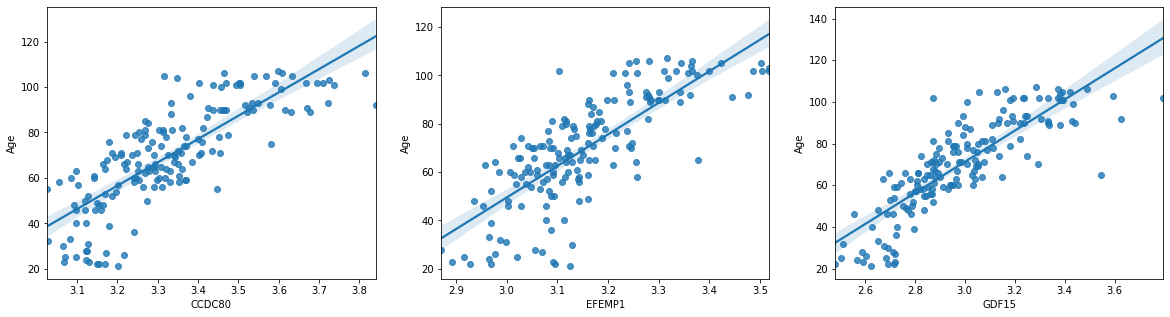

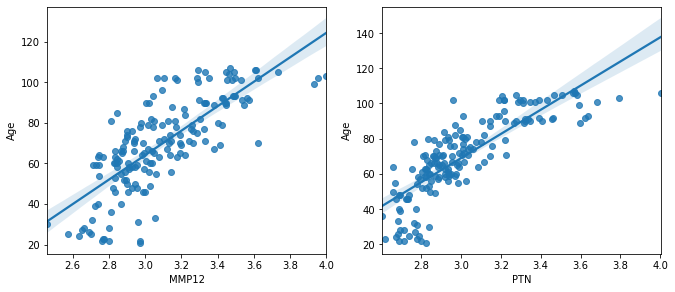

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.regplot(x = data['CCDC80'], y = data['Age'])

plt.subplot(1,3,2)
sns.regplot(x = data['EFEMP1'], y = data['Age'])

plt.subplot(1,3,3)
sns.regplot(x = data['GDF15'], y = data['Age'])
plt.show()

plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
sns.regplot(x = data['MMP12'], y = data['Age'])

plt.subplot(2,2,2)
sns.regplot(x = data['PTN'], y = data['Age'])
plt.show()

### В результате были найдены следующие параметры: `CCDC80`, `EFEMP1`, `GDF15`, `MMP12`, `PTN`

## Разделить возрастной диапазон на несколько диапазонов и выполнить статистическую проверку равенства средних значений между выборками диапазонов

In [5]:
# Разделим возрастной диапазон на несколько групп
def age_group(row):
    if row['Age'] <= 40:
        return 'До 40 лет'
    elif 40 < row['Age'] <= 60:
        return '41-60 лет'
    elif 60 < row['Age'] <= 80:
        return '61-80 лет'
    else:
        return 'От 81 года'
    
data.insert(2, 'age_group', value=data.apply(age_group, axis=1))

In [6]:
# Создадим выбокри по возрастным группам
data_1 = data.query('age_group == "До 40 лет"')
data_2 = data.query('age_group == "41-60 лет"')
data_3 = data.query('age_group == "61-80 лет"')
data_4 = data.query('age_group == "От 81 года"')

Все выборки имеют разное количество значений, поэтому определим для всех выборок один размер. Затем воспользуемся методом sample, для выбора случайных значений из выборки.

In [7]:
sample_size = 21
data_sample_1 = data_1
data_sample_2 = data_2.sample(n = sample_size)
data_sample_3 = data_3.sample(n = sample_size)
data_sample_4 = data_4.sample(n = sample_size)

### Выполним статистическую проверку равенства средних значений между выборками диапазонов.

#### Расчет t-статистики для двух выборок: `до 40 лет` и `от 81 года`.

[Далее](#paragraph1)

In [8]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_1[column], data_sample_4[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=0.617, p_value=0.541
ABL1: statistic=0.437, p_value=0.666
ABL2: statistic=-1.117, p_value=0.271
ACAN: statistic=0.062, p_value=0.951
ACE2: statistic=-3.762, p_value=0.001
ACP1: statistic=-0.277, p_value=0.783
ACP5: statistic=-0.720, p_value=0.476
ACVR1B: statistic=-3.873, p_value=0.000
ACVRL1: statistic=-0.688, p_value=0.497
ACY1: statistic=2.505, p_value=0.017
ADAM12: statistic=-1.671, p_value=0.107
ADAM9: statistic=0.428, p_value=0.673
ADAMTS1: statistic=-2.314, p_value=0.028
ADAMTS13: statistic=7.214, p_value=0.000
ADAMTS15: statistic=-4.200, p_value=0.000
ADAMTS4: statistic=-0.884, p_value=0.386
ADAMTS5: statistic=-6.028, p_value=0.000
ADCYAP1: statistic=0.221, p_value=0.827
ADCYAP1.1: statistic=-2.247, p_value=0.032
ADGRE2: statistic=-1.426, p_value=0.162
ADGRG5: statistic=-2.043, p_value=0.048
ADIPOQ: statistic=-3.208, p_value=0.003
ADM: statistic=-0.452, p_value=0.654
ADRBK1: statistic=0.804, p_value=0.428
ADSL: statistic=-1.361, p_value=0.182
AFM: statistic=1.523

In [9]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 576


<a name="paragraph1"></a>
#### Расчет t-статистики для двух выборок: `от 40 лет` и `41-60 лет`. 

[Далее](#paragraph2)

In [10]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_1[column], data_sample_2[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=0.132, p_value=0.896
ABL1: statistic=1.071, p_value=0.292
ABL2: statistic=-0.529, p_value=0.600
ACAN: statistic=0.371, p_value=0.713
ACE2: statistic=-2.366, p_value=0.026
ACP1: statistic=0.800, p_value=0.428
ACP5: statistic=-1.052, p_value=0.299
ACVR1B: statistic=-3.521, p_value=0.001
ACVRL1: statistic=-0.952, p_value=0.347
ACY1: statistic=-1.134, p_value=0.264
ADAM12: statistic=-0.383, p_value=0.704
ADAM9: statistic=2.334, p_value=0.025
ADAMTS1: statistic=-0.734, p_value=0.468
ADAMTS13: statistic=0.693, p_value=0.493
ADAMTS15: statistic=-2.159, p_value=0.038
ADAMTS4: statistic=0.124, p_value=0.902
ADAMTS5: statistic=-2.740, p_value=0.009
ADCYAP1: statistic=0.854, p_value=0.399
ADCYAP1.1: statistic=-1.487, p_value=0.145
ADGRE2: statistic=-0.878, p_value=0.386
ADGRG5: statistic=-1.871, p_value=0.069
ADIPOQ: statistic=-1.028, p_value=0.311
ADM: statistic=-0.999, p_value=0.324
ADRBK1: statistic=1.458, p_value=0.153
ADSL: statistic=-1.358, p_value=0.184
AFM: statistic=-2.296

In [11]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 238


<a name="paragraph2"></a>

#### Расчет t-статистики для двух выборок: `41-60 лет` и `61-80 лет`. 

[Далее](#paragraph3)

In [12]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_2[column], data_sample_3[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=0.722, p_value=0.474
ABL1: statistic=-0.484, p_value=0.631
ABL2: statistic=-1.505, p_value=0.140
ACAN: statistic=1.761, p_value=0.086
ACE2: statistic=0.249, p_value=0.805
ACP1: statistic=-1.166, p_value=0.251
ACP5: statistic=-2.002, p_value=0.053
ACVR1B: statistic=-1.012, p_value=0.317
ACVRL1: statistic=0.339, p_value=0.737
ACY1: statistic=-0.185, p_value=0.854
ADAM12: statistic=-0.442, p_value=0.661
ADAM9: statistic=0.455, p_value=0.652
ADAMTS1: statistic=0.590, p_value=0.560
ADAMTS13: statistic=3.683, p_value=0.001
ADAMTS15: statistic=-0.531, p_value=0.599
ADAMTS4: statistic=-1.759, p_value=0.091
ADAMTS5: statistic=-3.711, p_value=0.001
ADCYAP1: statistic=0.144, p_value=0.886
ADCYAP1.1: statistic=1.090, p_value=0.284
ADGRE2: statistic=-0.627, p_value=0.534
ADGRG5: statistic=-0.399, p_value=0.692
ADIPOQ: statistic=0.781, p_value=0.440
ADM: statistic=-0.639, p_value=0.527
ADRBK1: statistic=-0.000, p_value=1.000
ADSL: statistic=-0.319, p_value=0.752
AFM: statistic=1.084, 

In [13]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 108


<a name="paragraph3"></a>

#### Расчет t-статистики для двух выборок: `61-80 лет` и `от 81 года`. 

[Далее](#paragraph4)

In [14]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_3[column], data_sample_4[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=-0.304, p_value=0.763
ABL1: statistic=-0.662, p_value=0.513
ABL2: statistic=1.182, p_value=0.245
ACAN: statistic=-1.178, p_value=0.249
ACE2: statistic=-1.099, p_value=0.279
ACP1: statistic=0.045, p_value=0.964
ACP5: statistic=1.883, p_value=0.069
ACVR1B: statistic=-0.126, p_value=0.901
ACVRL1: statistic=0.162, p_value=0.872
ACY1: statistic=3.377, p_value=0.002
ADAM12: statistic=-0.892, p_value=0.378
ADAM9: statistic=-0.978, p_value=0.338
ADAMTS1: statistic=-2.265, p_value=0.032
ADAMTS13: statistic=4.073, p_value=0.000
ADAMTS15: statistic=-1.048, p_value=0.301
ADAMTS4: statistic=-0.455, p_value=0.652
ADAMTS5: statistic=-1.804, p_value=0.081
ADCYAP1: statistic=-0.894, p_value=0.377
ADCYAP1.1: statistic=-2.001, p_value=0.057
ADGRE2: statistic=0.027, p_value=0.979
ADGRG5: statistic=0.355, p_value=0.725
ADIPOQ: statistic=-3.026, p_value=0.004
ADM: statistic=1.208, p_value=0.236
ADRBK1: statistic=-0.281, p_value=0.781
ADSL: statistic=1.215, p_value=0.234
AFM: statistic=2.274, 

In [15]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 233


<a name="paragraph4"></a>

Проверим значения t-теста на 5 параметрах, которые мы нашли ранее: `CCDC80`, `EFEMP1`, `GDF15`, `MMP12`, `PTN`. Проверять будем на двух выборках: `до 40 лет` и `от 81 года`.

In [16]:
columns_for_test = ['CCDC80', 'EFEMP1', 'GDF15', 'MMP12', 'PTN']
for column in columns_for_test:
    statistic, p_value = ttest_ind(data_sample_4[column], data_sample_1[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))

CCDC80: statistic=9.682, p_value=0.000
EFEMP1: statistic=9.650, p_value=0.000
GDF15: statistic=13.784, p_value=0.000
MMP12: statistic=8.072, p_value=0.000
PTN: statistic=9.790, p_value=0.000


#### Для выбранных параметров p_value = 0, это говорит о опровержении нулевой гипотезы, а это значит, что эти параметры изменяются в процессе старения.